# **MONARCH DESIGNERS TILL NUMBER APP**
## ***A Business Intelligence PROJECT***
### Ramadhan Mwenda (C) 2024

# Monarch Designers
Monarch Designers is a digital services agency operating out of Mwiki Township in Kasarani Sub County within Nairobi County, Kenya.
The area is approximately 20 km from the Nairobi CBD and has a population of approximately 100,000 people.

Monarch Designers is a service based business that offers Printng, photocopying, Branding and Government Service consultancy. 
The business receives payments in two forms, Cash and via a Till Number. The data that is provided accounts only for the till number. Cash records are unavailable. The business also records sales in an invoicing platform called Wave. The sales records include item sold and price per item. The records are separate from this one. 

## Objective
The objective of this project is to analyze the sales data of Monarch Designers and provide insights on customer payment behaviour and to build a prediction model to forecast till payments.
The business looks to generate a fair estimate of revenues. 
This till number module should provide a baseline for the business forecast for 3 reasons;

1. The data is clean and comes from the MPESA till number Api.
2. The data is available for the entire period of the business operation.
3. The data is scaleable to other till merchants for easier collaboration / sale. 

## Key Questions to answer about the business payment data. 
1. Who are the top customers?
2. What is the average payment amount per transaction and per customer over time?
3. Are there repeat customers? How many? and what impact do they have on the total sales?
5. Are there patterns in payments? (Weekly, Monthly, Annually)
6. Are there any anomalies in the payments data?
7. Can we predict the next month's sales amount?


In [99]:
#imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv('transactions.csv', header=1)
df

,Date,Transaction ID,Sender Identifier,Name,Till No.,Fees,Amount,MM System,Status
0,2019-03-29 15:19,NCT7TV33DD,+254707476557,RAMADHAN MWENDA,632868,0.00,20.00,M-PESA,Complete
1,2019-03-29 18:49,NCT9U2D7Y3,+254757140643,HOSEA KIHARA,632868,0.00,200.00,M-PESA,Complete
2,2019-03-29 19:42,NCT4U4TMV8,+254707476557,RAMADHAN MWENDA,632868,0.00,20.00,M-PESA,Complete
3,2019-03-30 15:41,NCU3URX7A1,+254713794210,ABIGAIL MUNENE,632868,0.00,70.00,M-PESA,Complete
4,2019-04-03 11:39,ND39XXKTYF,+254795429253,IAN MUKUNDI,632868,0.00,20.00,M-PESA,Complete
...,...,...,...,...,...,...,...,...,...
10212,2024-08-26 14:43,SHQ7CY0Q91,ab088ad0f0a86a58b27322b5ea1b95408803d1d5da4616...,CHARLES,632868,1.38,250.00,M-PESA,Complete
10213,2024-08-26 16:40,SHQ7DEM4A9,c8c078cd8135d70ceceefebdafbdc065c093ce7e6b6de8...,Sarah,632868,0.00,40.00,M-PESA,Complete
10214,2024-08-26 17:10,SHQ6DJBDHS,4ea94fe16127e48739bdb51304493a48d88183b6fe3f0c...,THIERRY,632868,0.00,20.00,M-PESA,Complete
10215,2024-08-26 19:01,SHQ1E3YA0Z,e549ca972b087b2c0f3d11e8895662f9f448276c05a771...,Patrick,632868,1.38,250.00,M-PESA,Complete


The sender identifier changed in recent months to a hashed figure from the Phone number.

In [6]:
#info on the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10217 entries, 0 to 10216
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               10217 non-null  object 
 1   Transaction ID     10217 non-null  object 
 2   Sender Identifier  10217 non-null  object 
 3   Name               10217 non-null  object 
 4   Till No.           10217 non-null  int64  
 5   Fees               10217 non-null  float64
 6   Amount             10217 non-null  object 
 7   MM System          10217 non-null  object 
 8   Status             10217 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 718.5+ KB


Change date column to datetime and Amount to float

In [10]:
#convert amount to float
df['Amount'] = df['Amount'].str.replace(',','')
df['Amount'] = df['Amount'].astype('float')

In [11]:
df.dtypes

Date                  object
Transaction ID        object
Sender Identifier     object
Name                  object
Till No.               int64
Fees                 float64
Amount               float64
MM System             object
Status                object
dtype: object

In [12]:
df.describe(include='all')

,Date,Transaction ID,Sender Identifier,Name,Till No.,Fees,Amount,MM System,Status
count,10217,10217,10217,10217,10217.0,10217.000000,10217.000000,10217,10217
unique,10116,10217,5186,4768,NaN,NaN,NaN,1,3
top,2023-12-05 11:45,SHQ1E74IV7,+254722223487,WILLIAM MWINGA,NaN,NaN,NaN,M-PESA,Complete
freq,3,1,193,193,NaN,NaN,NaN,10217,10203
mean,NaN,NaN,NaN,NaN,632868.0,0.421156,134.512479,NaN,NaN
std,NaN,NaN,NaN,NaN,0.0,1.675688,313.814693,NaN,NaN
min,NaN,NaN,NaN,NaN,632868.0,0.000000,2.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,632868.0,0.000000,20.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,632868.0,0.000000,50.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,632868.0,0.000000,130.000000,NaN,NaN


In [106]:
max_payment_index = df['Amount'].idxmax()
highest_paying_customer = df.loc[max_payment_index, 'Name']
print(f"The customer who made the highest payment in one transaction is {highest_paying_customer} of Ksh. {df['Amount'].max():,}.")

The customer who made the highest payment in one transaction is JOSEPH KALENGA of Ksh. 12,300.0.


##### **Observations**
1. Total transactions are 10,217 
2. Top Customer is William Mwinga by 193 number of transactions 
3. Mean payment Amount is 134.69
4. Sender Identifier column is probably supposed to be categorical. it's a label not a number
5. Transaction ID is unique and not of much use same as TIll No and MM System 
6. The customer who made the highest payment in one transaction is JOSEPH KALENGA of Ksh. 12,300.0


In [13]:
#cols to drop
cols = ['Transaction ID','Till No.','MM System']
df = df.drop(columns= cols)
df

,Date,Sender Identifier,Name,Fees,Amount,Status
0,2019-03-29 15:19,+254707476557,RAMADHAN MWENDA,0.00,20.0,Complete
1,2019-03-29 18:49,+254757140643,HOSEA KIHARA,0.00,200.0,Complete
2,2019-03-29 19:42,+254707476557,RAMADHAN MWENDA,0.00,20.0,Complete
3,2019-03-30 15:41,+254713794210,ABIGAIL MUNENE,0.00,70.0,Complete
4,2019-04-03 11:39,+254795429253,IAN MUKUNDI,0.00,20.0,Complete
...,...,...,...,...,...,...
10212,2024-08-26 14:43,ab088ad0f0a86a58b27322b5ea1b95408803d1d5da4616...,CHARLES,1.38,250.0,Complete
10213,2024-08-26 16:40,c8c078cd8135d70ceceefebdafbdc065c093ce7e6b6de8...,Sarah,0.00,40.0,Complete
10214,2024-08-26 17:10,4ea94fe16127e48739bdb51304493a48d88183b6fe3f0c...,THIERRY,0.00,20.0,Complete
10215,2024-08-26 19:01,e549ca972b087b2c0f3d11e8895662f9f448276c05a771...,Patrick,1.38,250.0,Complete


In [9]:
#changing Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

#changing status to categorical
df['Status'] = df['Status'].astype('category')

#changing Sender Identifier to Object
df['Phone'] = df['Sender Identifier'].astype('object')


In [10]:
#dropping Sender Identifier column
df = df.drop(columns='Sender Identifier')
df

,Date,Name,Fees,Amount,Status,Phone
0,2019-03-29 15:19:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557
1,2019-03-29 18:49:00,HOSEA KIHARA,0.0,200.0,Complete,254757140643
2,2019-03-29 19:42:00,RAMADHAN MWENDA,0.0,20.0,Complete,254707476557
3,2019-03-30 15:41:00,ABIGAIL MUNENE,0.0,70.0,Complete,254713794210
4,2019-04-03 11:39:00,IAN MUKUNDI,0.0,20.0,Complete,254795429253
...,...,...,...,...,...,...
8435,2024-03-26 13:12:00,jane karanja,0.0,20.0,Complete,254703681535
8436,2024-03-26 13:31:00,ANN NJOKI,0.0,20.0,Complete,254722838482
8437,2024-03-26 18:18:00,GEORGE KIMANI,0.0,50.0,Complete,254727402133
8438,2024-03-26 19:14:00,JOHN NDIRANGU,0.0,100.0,Complete,254727423654


In [15]:
#convert all names to uppercase
df['Name'] = (df
              ['Name']
              .str
              .upper()
              )

In [16]:
df.isna().sum()

Date                 0
Sender Identifier    0
Name                 0
Fees                 0
Amount               0
Status               0
dtype: int64

## Univariate Analysis

<Axes: xlabel='Amount', ylabel='Count'>

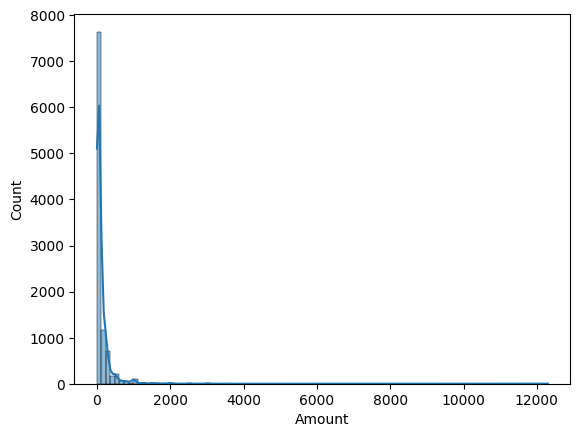

In [17]:
sns.histplot(data=df['Amount'], kde=True, bins= 100)

<Axes: ylabel='Amount'>

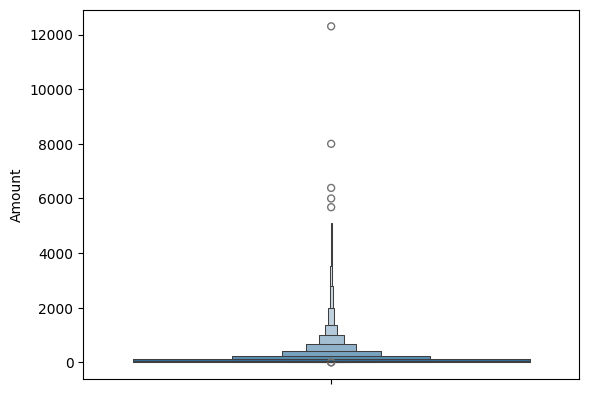

In [18]:
sns.boxenplot(data=df['Amount'])

There are a few outliers. 

In [23]:
df['Amount'].nlargest(5)

6397    12300.0
2798     8000.0
73       6386.0
6618     6000.0
5524     5680.0
Name: Amount, dtype: float64

In [20]:
df['Amount'].mode()

0    20.0
Name: Amount, dtype: float64

In [21]:
df['Amount'].median()

np.float64(50.0)

In [22]:
df['Amount'].mean()

np.float64(134.5124792013311)

1. The data is extremely positively skewed.
2. The mode of the data is `20`, the median is `50` and the mean is `134.69`

<Axes: xlabel='Fees', ylabel='Count'>

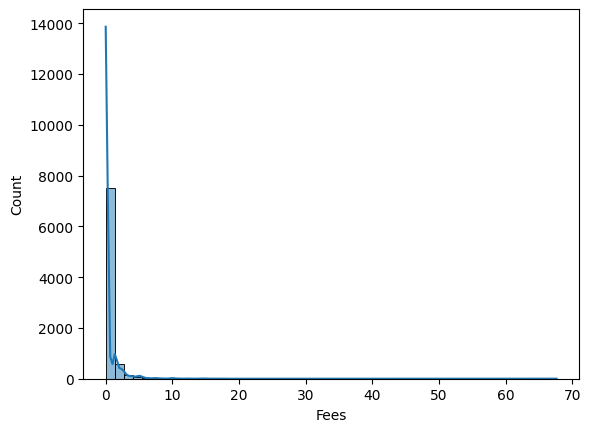

In [ ]:
sns.histplot(data=df['Fees'], kde=True, bins=50)

In [28]:
df['Dates'] = pd.to_datetime(df['Date'])
df

,Date,Sender Identifier,Name,Fees,Amount,Status,Dates
0,2019-03-29 15:19,+254707476557,RAMADHAN MWENDA,0.00,20.0,Complete,2019-03-29 15:19:00
1,2019-03-29 18:49,+254757140643,HOSEA KIHARA,0.00,200.0,Complete,2019-03-29 18:49:00
2,2019-03-29 19:42,+254707476557,RAMADHAN MWENDA,0.00,20.0,Complete,2019-03-29 19:42:00
3,2019-03-30 15:41,+254713794210,ABIGAIL MUNENE,0.00,70.0,Complete,2019-03-30 15:41:00
4,2019-04-03 11:39,+254795429253,IAN MUKUNDI,0.00,20.0,Complete,2019-04-03 11:39:00
...,...,...,...,...,...,...,...
10212,2024-08-26 14:43,ab088ad0f0a86a58b27322b5ea1b95408803d1d5da4616...,CHARLES,1.38,250.0,Complete,2024-08-26 14:43:00
10213,2024-08-26 16:40,c8c078cd8135d70ceceefebdafbdc065c093ce7e6b6de8...,SARAH,0.00,40.0,Complete,2024-08-26 16:40:00
10214,2024-08-26 17:10,4ea94fe16127e48739bdb51304493a48d88183b6fe3f0c...,THIERRY,0.00,20.0,Complete,2024-08-26 17:10:00
10215,2024-08-26 19:01,e549ca972b087b2c0f3d11e8895662f9f448276c05a771...,PATRICK,1.38,250.0,Complete,2024-08-26 19:01:00


In [29]:
df['Name'].nunique()

4535

There are 4535 unique names in the data

<Axes: ylabel='Name,Sender Identifier'>

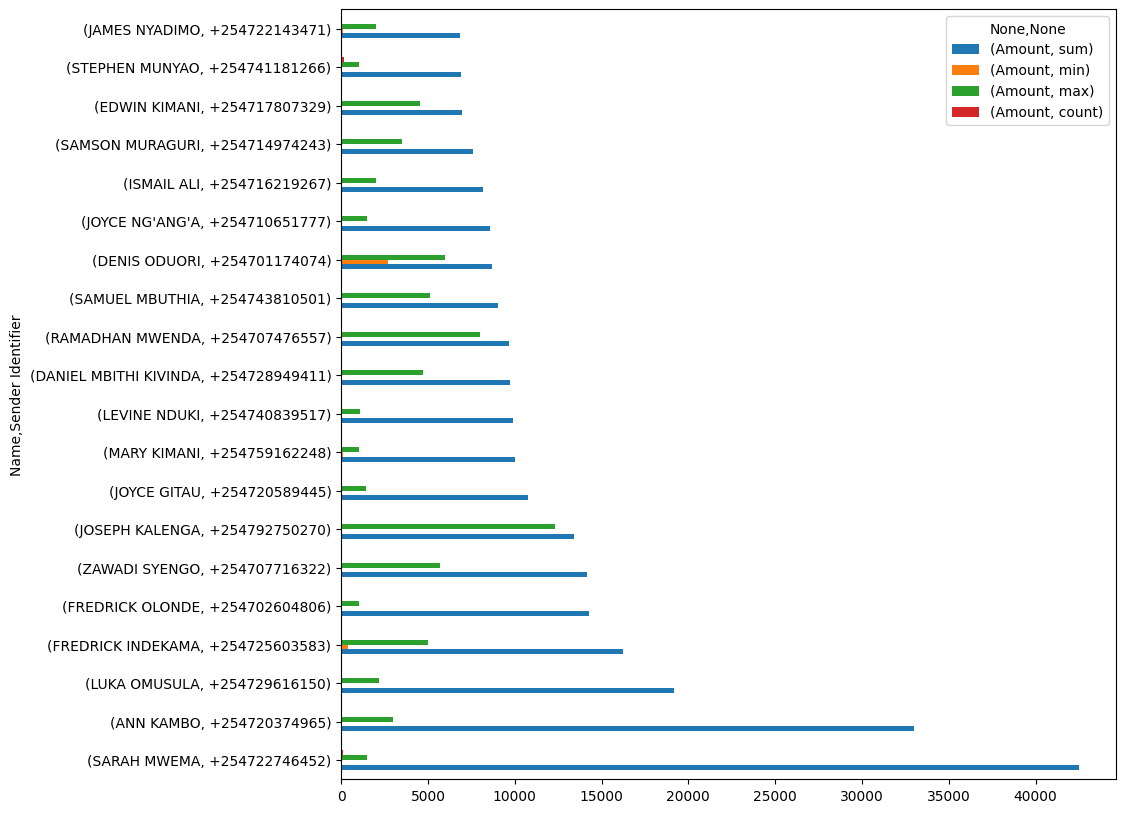

In [31]:
(df
.groupby(['Name','Sender Identifier'])
.agg({'Amount' : ['sum','min','max','count']})
.sort_values(by=('Amount','sum'), ascending=False)
.nlargest(20, columns=('Amount','sum'))
.plot(kind='barh',figsize=(10,10))
)


In [33]:
df1 = (df
       .groupby(['Name','Sender Identifier'])
       .agg({'Amount' : ['sum','min','max','count']})
       .sort_values(by=('Amount','count'), ascending=False)
       .nlargest(20, columns=('Amount','count'))
       #.plot(kind='barh',figsize=(10,10))
       )
df1

Amount                    
                                       sum   min     max count
Name            Sender Identifier                             
WILLIAM MWINGA  +254722223487       4610.0  10.0   350.0   193
STEPHEN MUNYAO  +254741181266       6920.0  20.0  1000.0   162
SARAH MWEMA     +254722746452      42515.0  20.0  1500.0    83
ERICK ONGWEN    +254721955309       2595.0  10.0   300.0    69
VICTOR MALOWA   +254705261696       1710.0  10.0    60.0    62
ANN KAMBO       +254720374965      33009.0  40.0  3000.0    39
LEVINE NDUKI    +254703760171       5310.0   5.0   750.0    38
FREDRICK OLONDE +254702604806      14260.0  50.0  1000.0    38
ZAWADI SYENGO   +254707716322      14183.0  30.0  5680.0    37
DANIEL NGATHEKA +254706760116       2300.0  10.0   700.0    37
JOHN KINYUGO    +254725122749       1515.0   5.0   800.0    36
FRANCIS KIAO    +254721950830       4555.0  20.0   300.0    35
JOYCE NG'ANG'A  +254710651777       8586.0  34.0  1500.0    35
JUSTUS MBULUNZE +254713936893        998.0   3.0   140.0    34
MARTHA NJOROGE  +254723452694       1055.0  20.0   200.0    33
DAVID KIIO      +254790219497       1060.0  10.0   200.0    31
BETH NDUNYU     +254720371794       5255.0  45.0   550.0    30
GORDON ANDEGA   +254706561724       1510.0  10.0   150.0    29
KELVIN ODONGA   +254723049308       3705.0  10.0   800.0    27
LEVINE NDUKI    +254740839517       9910.0   5.0  1100.0    26

In [36]:
df = df.set_index('Date')

In [43]:
df.index = pd.to_datetime(df.index)

In [44]:
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day_of_week

In [45]:
def create_features(df):
    '''
    Create new features from the date index
    '''
    df=df.copy()
    df['hour'] = df.index.hour
    df['day'] = df.index.dayofweek
    df['month'] = df.index.month
    df['day_name'] = df.index.day_name()
    return df

In [46]:
df = create_features(df)

In [47]:
df

,Sender Identifier,Name,Fees,Amount,Status,Dates,year,month,day,hour,day_name
Date,,,,,,,,,,,
2019-03-29 15:19:00,+254707476557,RAMADHAN MWENDA,0.00,20.0,Complete,2019-03-29 15:19:00,2019,3,4,15,Friday
2019-03-29 18:49:00,+254757140643,HOSEA KIHARA,0.00,200.0,Complete,2019-03-29 18:49:00,2019,3,4,18,Friday
2019-03-29 19:42:00,+254707476557,RAMADHAN MWENDA,0.00,20.0,Complete,2019-03-29 19:42:00,2019,3,4,19,Friday
2019-03-30 15:41:00,+254713794210,ABIGAIL MUNENE,0.00,70.0,Complete,2019-03-30 15:41:00,2019,3,5,15,Saturday
2019-04-03 11:39:00,+254795429253,IAN MUKUNDI,0.00,20.0,Complete,2019-04-03 11:39:00,2019,4,2,11,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-26 14:43:00,ab088ad0f0a86a58b27322b5ea1b95408803d1d5da4616...,CHARLES,1.38,250.0,Complete,2024-08-26 14:43:00,2024,8,0,14,Monday
2024-08-26 16:40:00,c8c078cd8135d70ceceefebdafbdc065c093ce7e6b6de8...,SARAH,0.00,40.0,Complete,2024-08-26 16:40:00,2024,8,0,16,Monday
2024-08-26 17:10:00,4ea94fe16127e48739bdb51304493a48d88183b6fe3f0c...,THIERRY,0.00,20.0,Complete,2024-08-26 17:10:00,2024,8,0,17,Monday


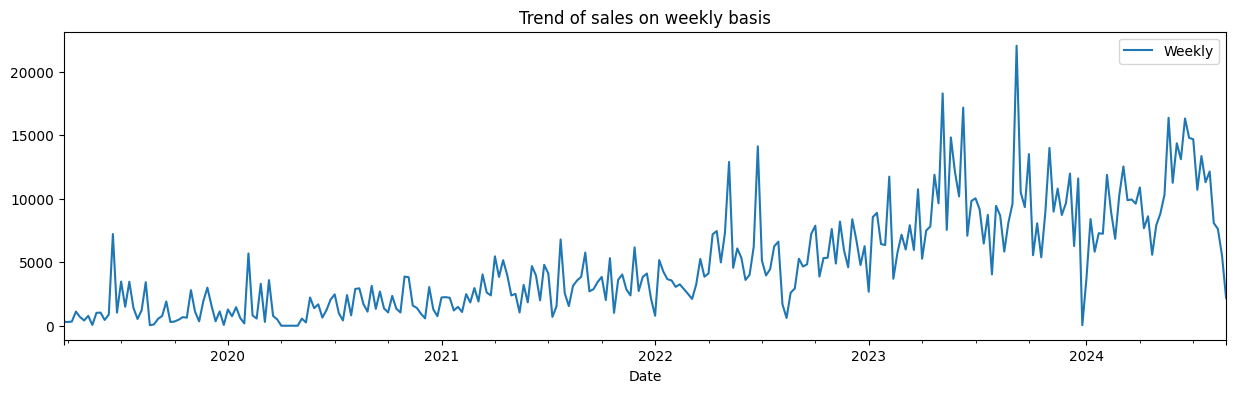

In [48]:
plt.figure(figsize=(15,4))
df['Amount'].resample('W').sum().plot(label='Weekly')
plt.title('Trend of sales on weekly basis')
plt.legend()
plt.show()

There is an upward trend over time, Indicating that Monarch has been growing in revenue over the past 5 years.

C:\Users\Harith\AppData\Local\Temp\ipykernel_14700\2835619059.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Amount'].resample('M').sum().plot(label='Monthly')


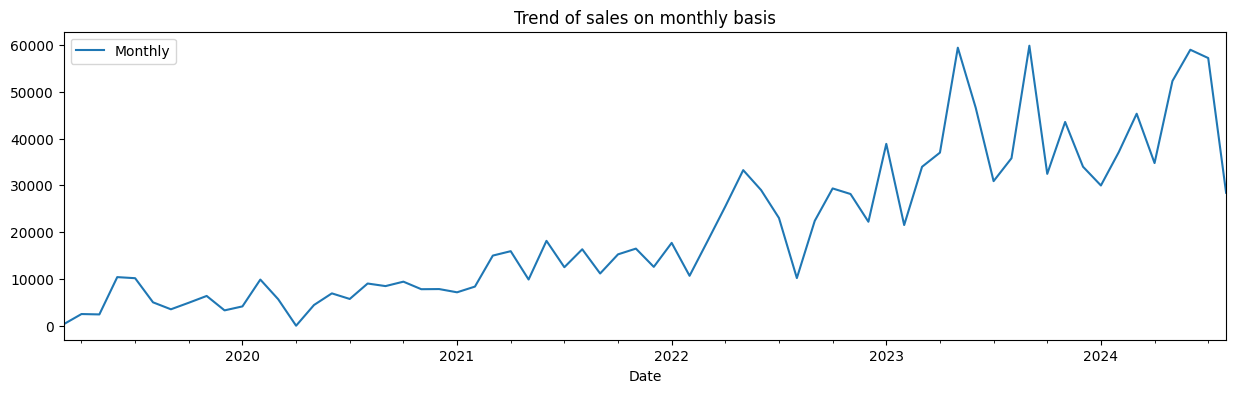

In [49]:
plt.figure(figsize=(15,4))
df['Amount'].resample('M').sum().plot(label='Monthly')
plt.title('Trend of sales on monthly basis')
plt.legend()
plt.show()

There is an upward trend over time but there doesn't seem to be much seasonality.
This upward sales trend indicates that Monarch Designers is in a healthy growth phase, leveraging its strategies to expand its market share and maintain consistent performance across multiple periods.The company has achieved a level of stability, where sales are relatively consistent throughout the year.

C:\Users\Harith\AppData\Local\Temp\ipykernel_14700\2597087543.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['Amount'].resample('M').mean().plot(label='Monthly')


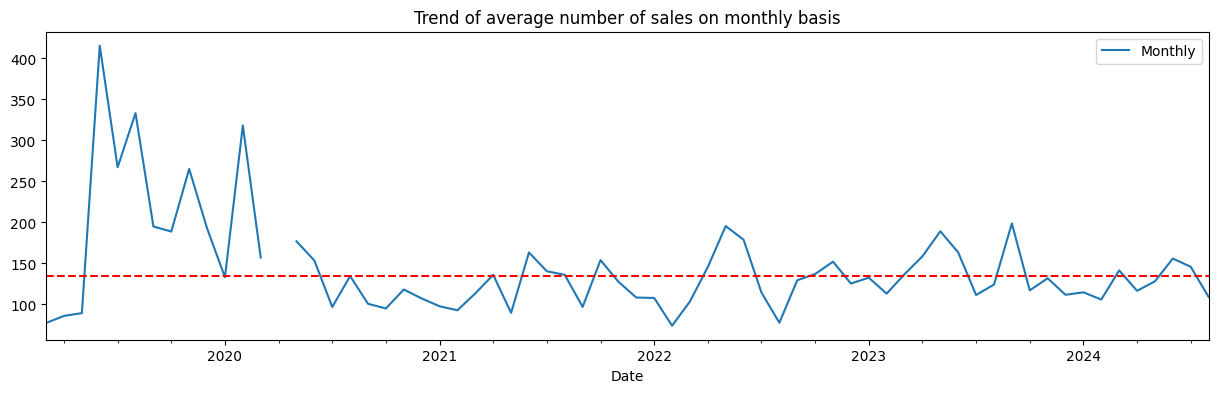

In [54]:
plt.figure(figsize=(15,4))
df['Amount'].resample('M').mean().plot(label='Monthly')
plt.axhline(y=df['Amount'].mean(), color='r', linestyle='--')
plt.title('Trend of average number of sales on monthly basis')
plt.legend()
plt.show()

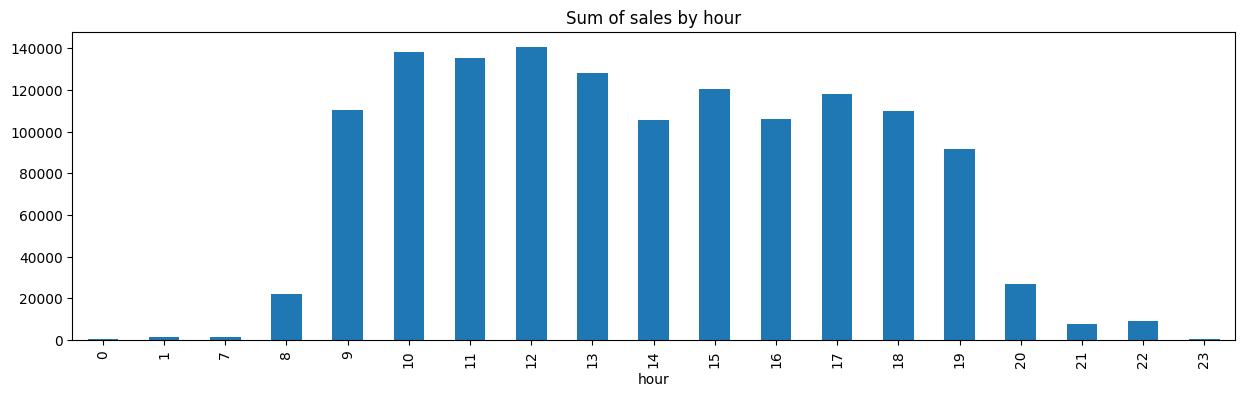

In [51]:
#check performance by hours
plt.figure(figsize=(15,4))
df[['Amount','hour']].groupby('hour').Amount.sum().plot.bar()
plt.title('Sum of sales by hour')
plt.show()

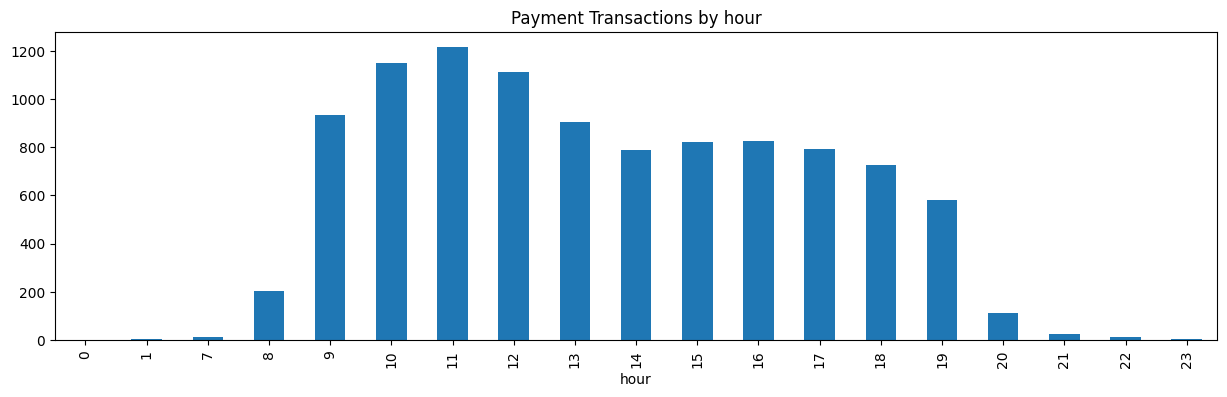

In [52]:
plt.figure(figsize=(15,4))
df[['Amount','hour']].groupby('hour').Amount.count().plot.bar()
plt.title('Payment Transactions by hour')
plt.show()

1. The traffic of payments is highest between 10 a.m and 1 p.m. 
2. There is a second peak between 3 and 6 pm

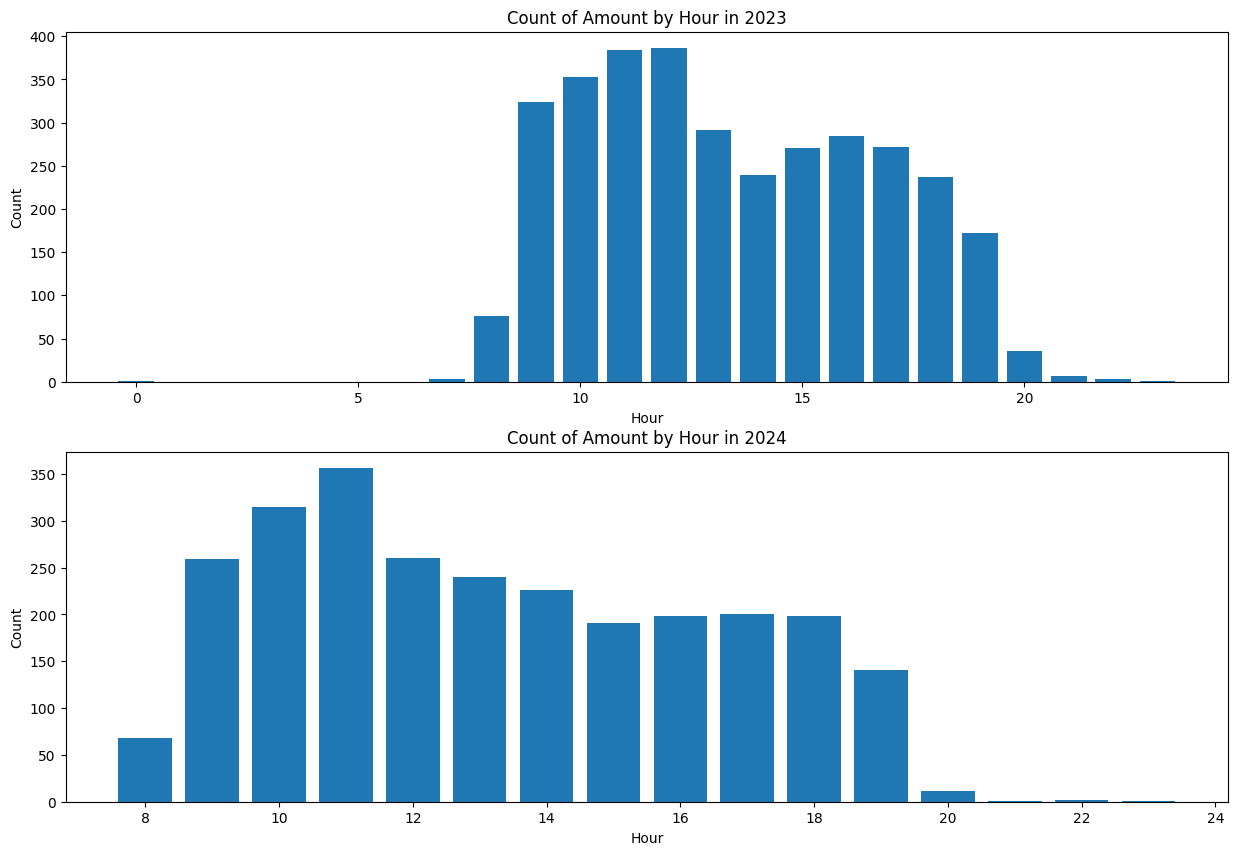

In [55]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))

df_2023 = df.loc['2023'][['Amount','hour']].groupby('hour').Amount.count()
df_2024 = df.loc['2024'][['Amount','hour']].groupby('hour').Amount.count()

axs[0].bar(df_2023.index, df_2023.values)
axs[0].set_title('Count of Amount by Hour in 2023')
axs[0].set_xlabel('Hour')
axs[0].set_ylabel('Count')

axs[1].bar(df_2024.index, df_2024.values)
axs[1].set_title('Count of Amount by Hour in 2024')
axs[1].set_xlabel('Hour')
axs[1].set_ylabel('Count')

plt.show()

3. Who are the top repeat customers? and what impact do they have on the total sales?

In [108]:
print(f'There are {df["Name"].nunique()} unique customers')

There are 4535 unique customers


In [109]:
df1 = (df
       .groupby('Name')
       .agg({'Amount' : ['sum','count']})
       .sort_values(by=('Amount','count'), ascending=False)
       .nlargest(45, columns=('Amount','count'))
       )
df1

Amount      
                     sum count
Name                          
WILLIAM MWINGA    4610.0   193
STEPHEN MUNYAO    6920.0   162
SARAH MWEMA      42515.0    83
ERICK ONGWEN      2635.0    71
LEVINE NDUKI     15220.0    64
VICTOR MALOWA     1710.0    62
GORDON ANDEGA     3100.0    60
ZAWADI SYENGO    14773.0    42
PETER             5395.0    40
ANN KAMBO        33009.0    39
JUSTUS MBULUNZE   1148.0    38
FREDRICK OLONDE  14260.0    38
JOHN KINYUGO      1605.0    38
JOHN MAINA        5935.0    38
DANIEL NGATHEKA   2300.0    37
JOYCE NG'ANG'A    8586.0    35
FRANCIS KIAO      4555.0    35
KARIUKI THAIRU    5665.0    33
MARTHA NJOROGE    1055.0    33
DAVID KIIO        1110.0    32
BETH NDUNYU       5255.0    30
JAMES NYADIMO     8040.0    29
SAMUEL KAMAU      6040.0    28
KELVIN ODONGA     3705.0    27
PETER ODHIAMBO    1715.0    26
SAMUEL MBUTHIA    9015.0    26
JOYCE GITAU      10775.0    25
EVILIDER KAMBU    3700.0    25
NANCY MUSYIMI     2035.0    24
JOSEPH            3475.0    23
PHILIP KIGOTHO    1985.0    23
SAMUEL            4250.0    22
SAMUEL MULINGE    6410.0    22
MARY KIMANI      10180.0    22
LUKA OMUSULA     19165.0    22
JANE MBUGUAH      3620.0    21
WILLIAM MBATA      810.0    21
BENEDICT MBITHI   5475.0    21
BENSON MBOGO      2677.0    19
OWEN MULINGE      1775.0    19
STANLEY MEKENYE   1880.0    19
JUMA OLIMA        1520.0    19
EDWIN KIMANI      7555.0    19
FELIX KIIO        3977.0    19
GRACE LENKESIA    1715.0    18

In [131]:
top_1_pct_sales = df1['Amount']['sum'].sum()
total_sales = df['Amount'].sum()

print(f'The top 45 repeat customers have contributed {(top_1_pct_sales / total_sales) * 100 :.2f}% of total sales from 2019 to 2024')

The top 45 repeat customers have contributed 22.04% of total sales from 2019 to 2024


In [132]:
df_2024 = df.loc['2024']
df_2024['Name'].nunique()

1468

In [133]:
top_2024 = (df_2024
            .groupby('Name')
            .agg({'Amount' : ['sum','count']})
            .sort_values(by=('Amount','count'), ascending=False)
            .nlargest(15, columns=('Amount','count'))
            )
top_2024

Amount      
                      sum count
Name                           
PETER              5395.0    40
WILLIAM MWINGA      910.0    38
JOSEPH             3475.0    23
SAMUEL             4250.0    22
SARAH MWEMA       11175.0    20
JAMES              1015.0    18
MARY               2145.0    16
FELEX MBOGA         920.0    13
ERICK ONGWEN        660.0    12
JACKLINE ONKUNDI    230.0    12
FRANCIS            1545.0    11
REMMY KEMBOI        760.0    11
BETH NDUNYU        1400.0    10
STEPHEN             765.0    10
JOHN                580.0    10

In [136]:
top_1_pct_2024 = top_2024['Amount']['sum'].sum()
total_sales_24 = df_2024['Amount'].sum()

print(f'The top 15 repeat customers in 2024 have contributed {(top_1_pct_2024 / total_sales_24) * 100 :.2f}% of total sales')

The top 15 repeat customers in 2024 have contributed 10.24% of total sales


In [137]:
df_2023 = df.loc['2023']
df_2023['Name'].nunique()

1840

In [138]:
top_2023 = (df_2023
            .groupby('Name')
            .agg({'Amount' : ['sum','count']})
            .sort_values(by=('Amount','count'), ascending=False)
            .nlargest(18, columns=('Amount','count'))
            )
top_2023

Amount      
                      sum count
Name                           
WILLIAM MWINGA     2100.0    88
STEPHEN MUNYAO     1465.0    39
SARAH MWEMA       23750.0    36
ERICK ONGWEN       1075.0    29
JOHN KINYUGO        555.0    25
JUSTUS MBULUNZE     500.0    20
LEVINE NDUKI       6850.0    20
WILLIAM MBATA       640.0    19
JAMES NYADIMO      6420.0    18
JOYCE NG'ANG'A     2308.0    16
EVA WAWERU         4110.0    16
EDWIN KIMANI       7235.0    15
PHILIP KIGOTHO      715.0    14
PETER ODHIAMBO     1285.0    14
JOHN MAINA         2005.0    14
ERIC NJENGA        1121.0    12
BINTIHAMISI JUMA   1095.0    12
SAMUEL MBUTHIA     7235.0    12

In [140]:
top_1_pct_2023 = top_2023['Amount']['sum'].sum()
total_sales_23 = df_2023['Amount'].sum()

print(f'The top 18 repeat customers in 2023 contributed {(top_1_pct_2023 / total_sales_23) * 100 :.2f}% of total sales')

The top 18 repeat customers in 2023 contributed 14.87% of total sales
